In [1]:
import numpy as np
from netCDF4 import Dataset
import numpy as np
import numpy.ma as ma
import pandas as pd
from numpy import hstack,vstack,dstack
import matplotlib.pyplot as plt
import gc


In [2]:
bchain = np.array(
        [112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
         118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
         114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
         162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
         209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
         272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
         302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
         315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
         318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
         348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
         362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
         342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
         417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
         432.], dtype=np.float32)
bchain = bchain[:, np.newaxis]

inp_dim = 1
out_dim = 1
mid_dim = 8
mid_layers = 1
data_x = bchain[:-1, :]
data_y = bchain[+1:, :]
# data_x shape：(143, 1)
# data_y shape：(143, 1)

train_size = 113
train_x = data_x[:train_size, :]
train_y = data_y[:train_size, :]
# train_x shape: (113, 1)
# train_y shape: (113, 1)
def minmaxscaler(x):
    minx = np.amin(x)
    maxx = np.amax(x)
    return (x - minx)/(maxx - minx), (minx, maxx)

def preminmaxscaler(x, minx, maxx):
    return (x - minx)/(maxx - minx)

def unminmaxscaler(x, minx, maxx):
    return x * (maxx - minx) + minx

# 预处理数据  归一化
train_x, train_x_minmax = minmaxscaler(train_x)
train_y, train_y_minmax = minmaxscaler(train_y)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # 第一种操作，直接把batch_x batch_y这一个序列扔进去
# batch_x = train_x[:, np.newaxis, :]
# batch_y = train_y[:, np.newaxis, :]
# batch_x = torch.tensor(batch_x, dtype=torch.float32, device=device)
# batch_y = torch.tensor(batch_y, dtype=torch.float32, device=device)


In [3]:
airTemp = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/tas.nc'
netLongRadiantionFlux = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/rlns.nc'
shortwaveRadiation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/rsds.nc'
precipitation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/pr.nc'
output = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/jedi_output.nc'

landSeaMask = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/landsea.nc'
lantitude =  'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/latitude.nc'
longitude = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/longitude.nc'
elevation = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/elevation.nc'
moisture = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/paw.nc'
spatialMetaData = 'D:/1study/VegeSimulation/for_students/for_students/global-longrun_jedi-dvgm_inputs_outputs/globe_surf.nc'

airTempDataset = Dataset(airTemp)
netLongRadiantionFluxDataSet = Dataset(netLongRadiantionFlux)
shortwaveRadiationDataset = Dataset(shortwaveRadiation)
precipitationDataSet = Dataset(precipitation)
outputDataset = Dataset(output)

landSeaMaskDataset = Dataset(landSeaMask)
lantitudeDataset = Dataset(lantitude)
longitudeDataset = Dataset(longitude)
elevationDataset = Dataset(elevation)
moistureDataset = Dataset(moisture)
spatialMetaDataset = Dataset(spatialMetaData)

airTempArray = airTempDataset['tas'][:].squeeze()
netLongRadiantionFluxArray = netLongRadiantionFluxDataSet['rlns'][:].squeeze()
shortwaveRadiationArray = shortwaveRadiationDataset['rsds'][:].squeeze()
precipitationArray = precipitationDataSet['pr'][:].squeeze()
NPPArray = outputDataset['NPP'][:].squeeze()
landSeaMaskArray = landSeaMaskDataset['var1'][:].squeeze()
lantitudeArray = lantitudeDataset['lat'][:].squeeze()
longitudeArray = longitudeDataset['lon'][:].squeeze()
elevationArray = elevationDataset['data'][:].squeeze()
moistureArray = moistureDataset['paw'][:].squeeze()
spatialMetaDataArray = spatialMetaDataset['lev']

In [83]:
def normalize(x):
    normalized = []
    for i in range(len(x)):
        normalized.append((x[i]-np.min(x))/(np.max(x)-np.min(x)))
    return np.array(normalized)

In [139]:
reshape_NPP = NPPArray.reshape(3516,-1)
col_index_0 = []
for i in range(reshape_NPP.shape[1]):
    if np.all(reshape_NPP[:,i] == 0) == True:
        col_index_0.append(i)
        continue
    if np.count_nonzero(reshape_NPP[:,i])<3400:
        col_index_0.append(i)   

In [140]:
reshape_airTemp = airTempArray.reshape(3516,-1)
reshape_precipitation = precipitationArray.reshape(3516,-1)
reshape_netLongRadiantionFlux = netLongRadiantionFluxArray.reshape(3516,-1)
reshape_shortwaveRadiation = shortwaveRadiationArray.reshape(3516,-1)

clear_npp = np.delete(reshape_NPP,col_index_0,axis=1)
clear_airTemp = np.delete(reshape_airTemp,col_index_0,axis=1)
clear_precip = np.delete(reshape_precipitation,col_index_0,axis=1)
clear_rlns = np.delete(reshape_netLongRadiantionFlux,col_index_0,axis=1)
clear_rsds = np.delete(reshape_shortwaveRadiation,col_index_0,axis=1)

In [141]:
def moving_average(x,N):
    n=np.ones(N)
    weights=n/N
    moving_aver=np.convolve(weights,x)[N-1:-N+1]
    return moving_aver

In [142]:
moveing_clear_clear_npp = moving_average(clear_npp[:,233],12)
moveing_clear_clear_npp.reshape(-1,1)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [-0.00492625],
       [-0.00488759],
       [-0.00753116]])

In [143]:
clear_airTemp[:,233].reshape(3516,1)

masked_array(
  data=[[275.47503662],
        [276.40142822],
        [275.16125488],
        ...,
        [271.21972656],
        [272.07958984],
        [275.23822021]],
  mask=False,
  fill_value=1e+20)

In [144]:
normalize(moving_average(clear_npp[:,233],12)).reshape(-1,1)

array([[0.85364671],
       [0.85364671],
       [0.85364671],
       ...,
       [0.58807057],
       [0.5901548 ],
       [0.44763873]])

In [145]:
moving_average(clear_npp[:,233],12)

array([ 0.        ,  0.        ,  0.        , ..., -0.00492625,
       -0.00488759, -0.00753116])

In [146]:
train_dataset = hstack((normalize(moving_average(clear_precip[:,233],12)).reshape(-1,1),
                        normalize(moving_average(clear_airTemp[:,233],12)).reshape(-1,1),
                        normalize(moving_average(clear_rlns[:,233],12)).reshape(-1,1),
                        normalize(moving_average(clear_rsds[:,233],12)).reshape(-1,1),
                        normalize(moving_average(clear_npp[:,233],12)).reshape(-1,1)))

In [147]:
test_dataset = hstack((normalize(moving_average(clear_precip[:,300],12)).reshape(-1,1),
                        normalize(moving_average(clear_airTemp[:,300],12)).reshape(-1,1),
                        normalize(moving_average(clear_rlns[:,300],12)).reshape(-1,1),
                        normalize(moving_average(clear_rsds[:,300],12)).reshape(-1,1),
                        normalize(moving_average(clear_npp[:,300],12)).reshape(-1,1)))

In [148]:
test_dataset

array([[0.34992791, 0.66950713, 0.83866592, 0.21337846, 0.7501658 ],
       [0.28722481, 0.69580486, 0.81338716, 0.26731852, 0.7501658 ],
       [0.34973785, 0.73932715, 0.79459352, 0.26612683, 0.7501658 ],
       ...,
       [0.60198861, 0.67223419, 0.36012309, 0.43461088, 0.6129254 ],
       [0.69587821, 0.6823982 , 0.44813553, 0.30184347, 0.6147395 ],
       [0.75605325, 0.70963692, 0.51129934, 0.12719103, 0.61822659]])

In [149]:
train_dataset.shape

(3505, 5)

In [150]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset|
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[i:end_ix, -1].mean(axis = -1)
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [151]:
n_step = 4
train_x, train_y = split_sequences(train_dataset, n_step)
test_x, test_y = split_sequences(test_dataset, n_step)


In [152]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM,CuDNNLSTM,Embedding,Activation
from keras.layers import Dense
from keras.layers import Dropout

n_step = 3
n_features = 4

# define model
model = Sequential()
# model.add(LSTM(16, activation='tanh', input_shape=(train_x.shape[1:]), return_sequences=True))
# model.add(Dropout(0.2))
model.add(CuDNNLSTM(128,input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(Dropout(0.2))
model.add(CuDNNLSTM(32,input_shape=(train_x.shape[1:])))
model.add(Dropout(0.2))
model.add(Dense(32))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'],)

# fit model
model.fit(train_x, train_y, epochs=200)

# test model，score=mse loss
# scores = model.evaluate(test_x,test_y)
y_hat = model.predict(train_x,verbose=0)
# print('Test mse loss = {} '.format(round(scores,5)))

Epoch 1/200
110/110 [==============================] - 2s 8ms/step - loss: 0.0364 - accuracy: 0.0000e+00
Epoch 2/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 3/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 4/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 5/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0137 - accuracy: 0.0000e+00
Epoch 6/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0132 - accuracy: 0.0000e+00
Epoch 7/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 8/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 9/200
110/110 [==============================] - 1s 7ms/step - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 10/200
110/110 [==============================] -

In [153]:

y_hat_test = model.predict(test_x,verbose=0)
# print('Test mse loss = {} '.format(round(scores,5)))

In [154]:
y_hat.shape

(3502, 1)

In [155]:
np.flip(np.rot90(y_hat, -1),1)

array([[0.8667712 , 0.88017875, 0.8700632 , ..., 0.61999416, 0.61917996,
        0.62167454]], dtype=float32)

<function matplotlib.pyplot.show(close=None, block=None)>

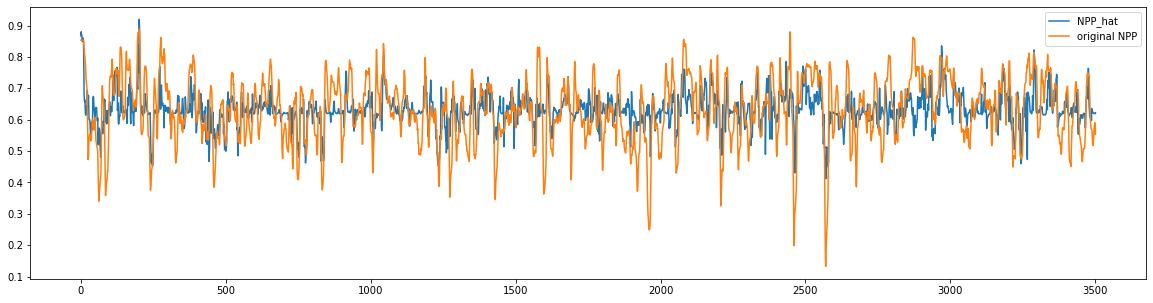

In [156]:
plt.figure(figsize=(20,5))
plt.plot(y_hat,label = "NPP_hat")
plt.plot(train_y,label = "original NPP")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

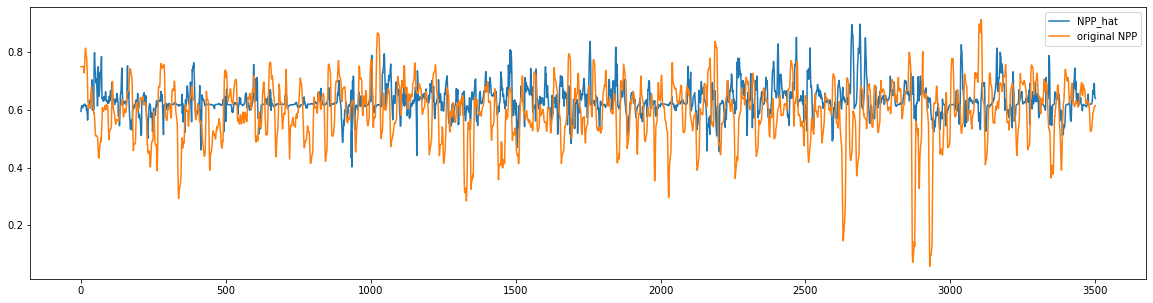

In [157]:
plt.figure(figsize=(20,5))
plt.plot(y_hat_test,label = "NPP_hat")
plt.plot(test_y,label = "original NPP")
plt.legend()
plt.show

In [158]:
clear_precip.shape[1]

5845

In [159]:
normalize(moving_average(clear_npp[:,i],12)).reshape(-1,1)

IndexError: index 27839 is out of bounds for axis 1 with size 5845

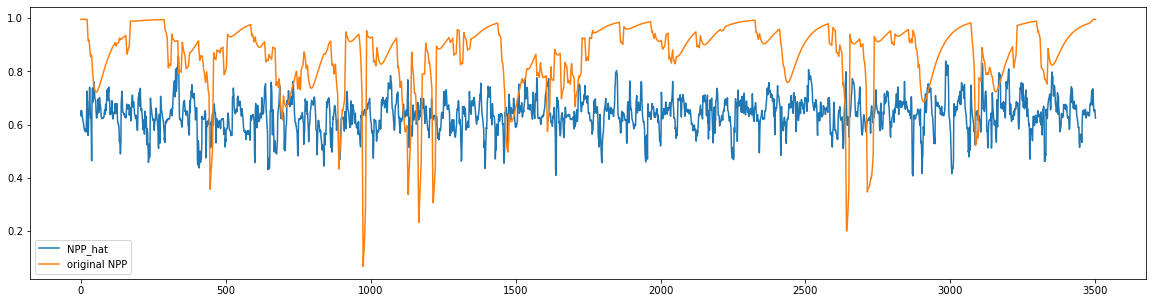

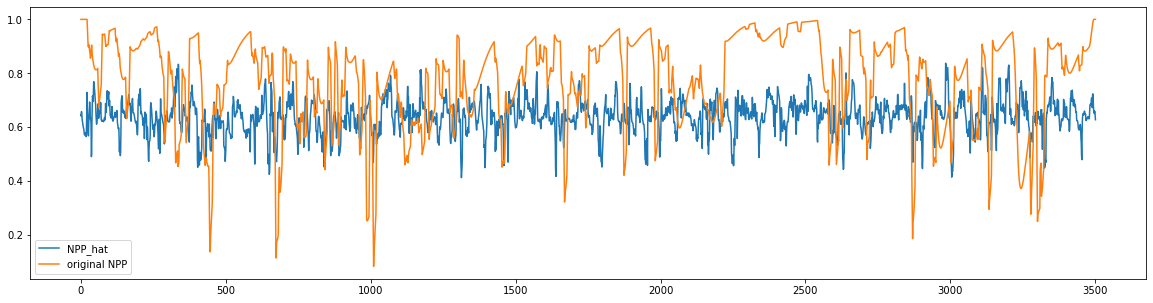

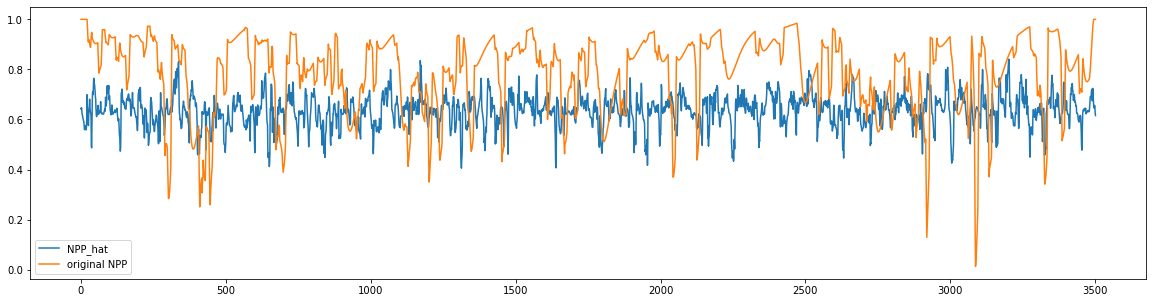

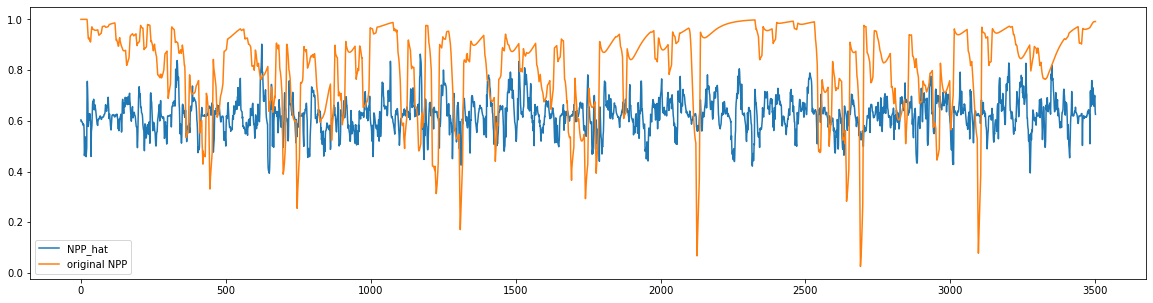

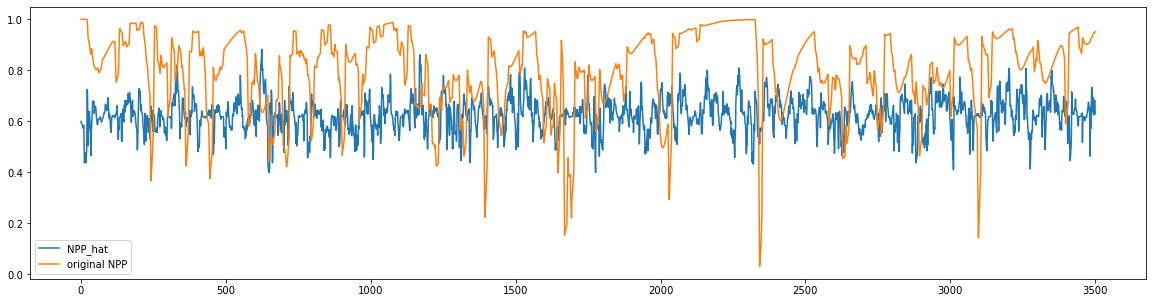

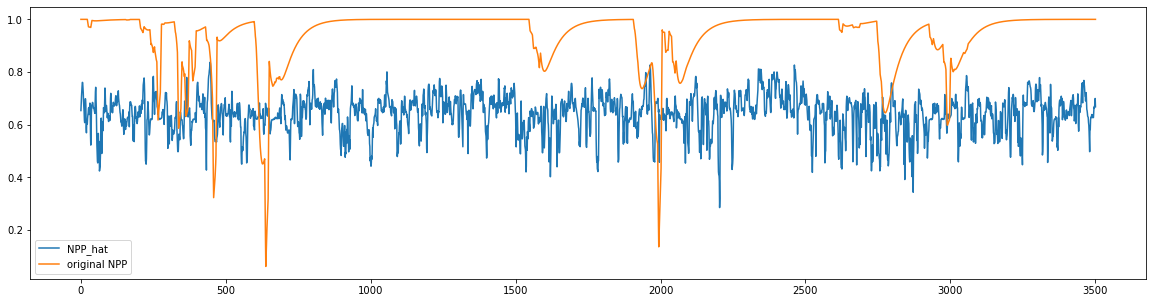

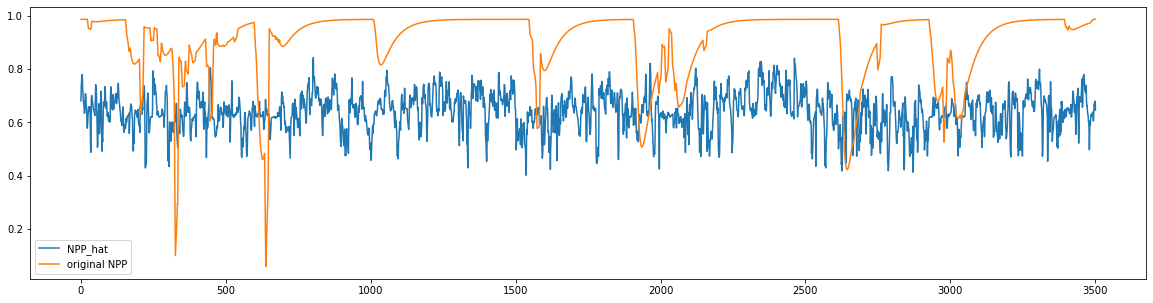

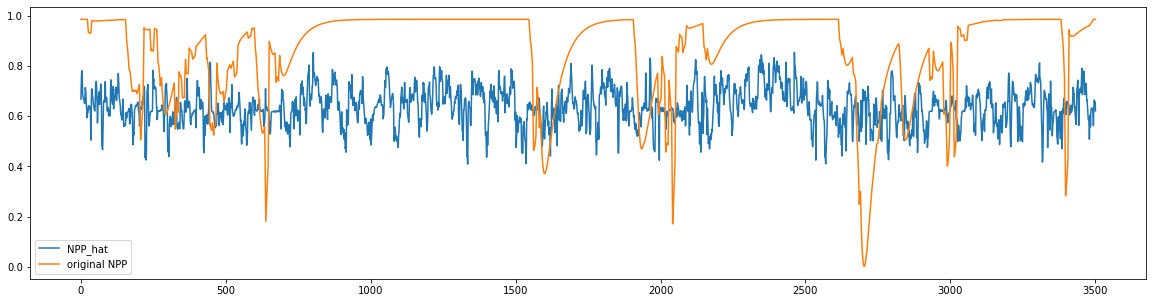

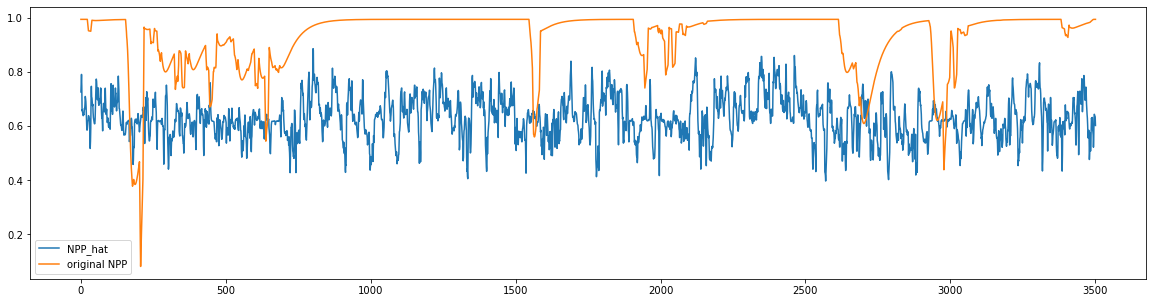

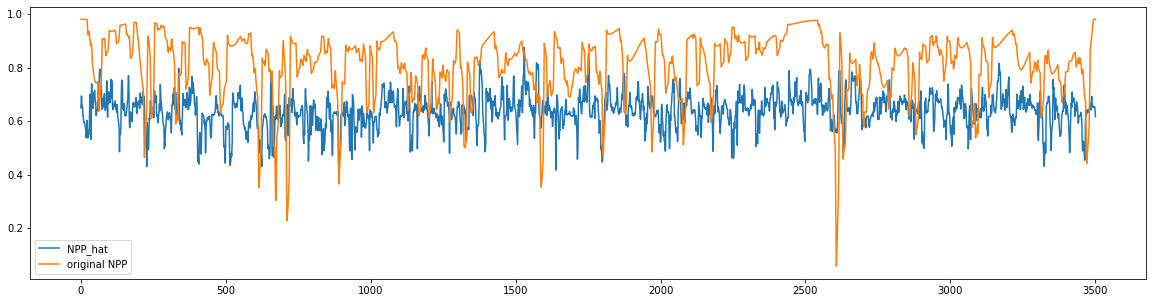

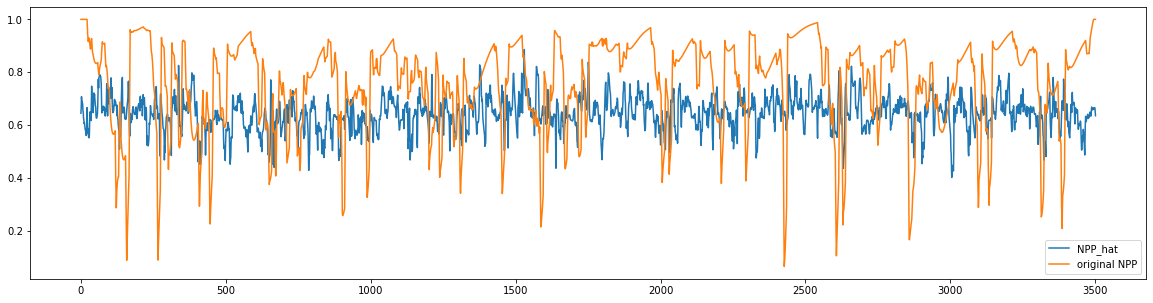

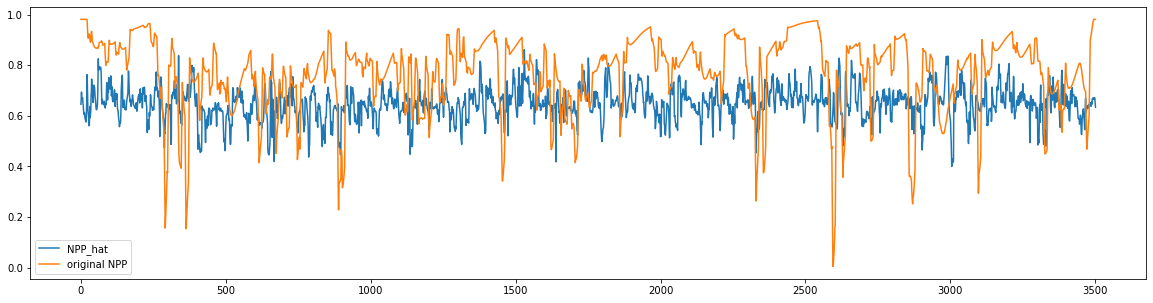

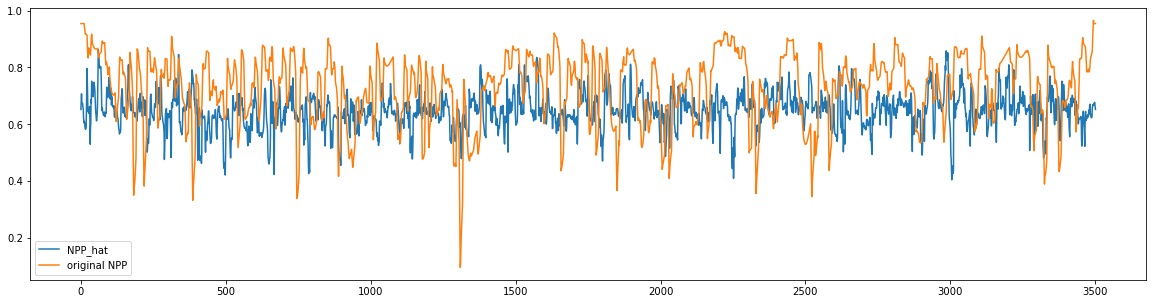

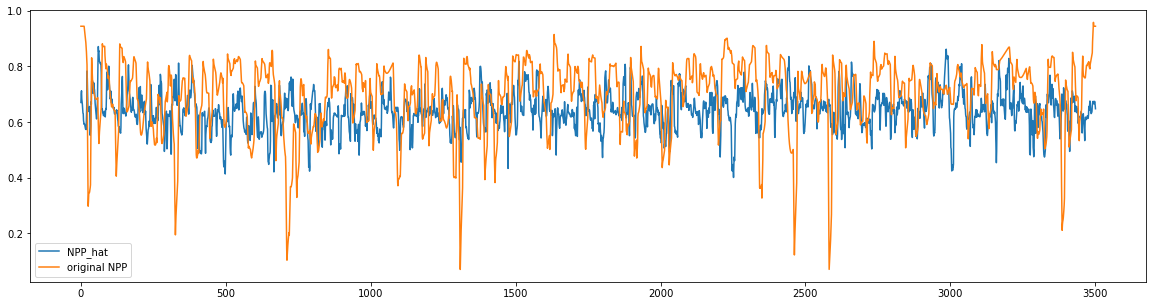

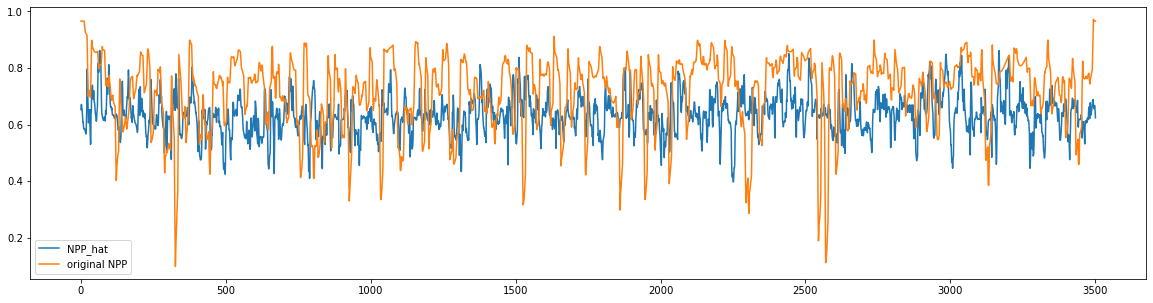

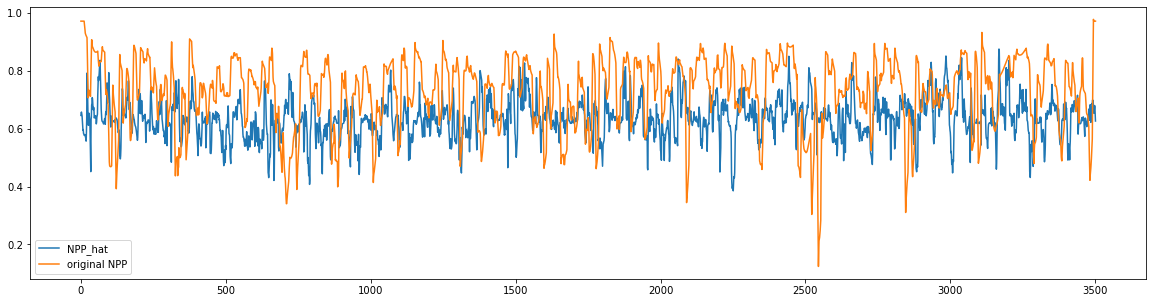

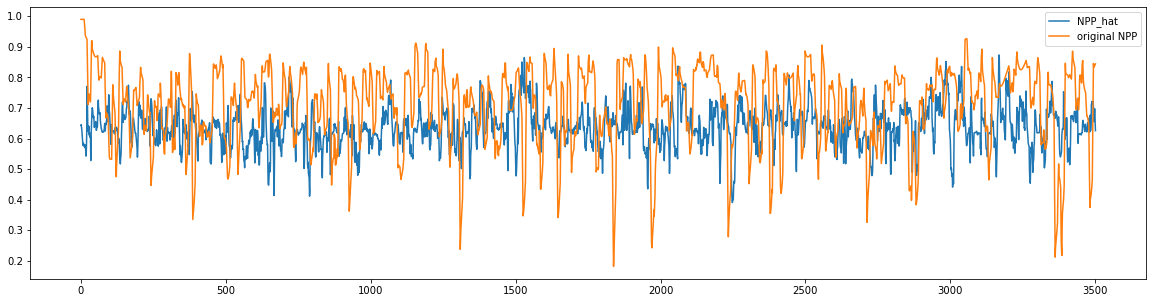

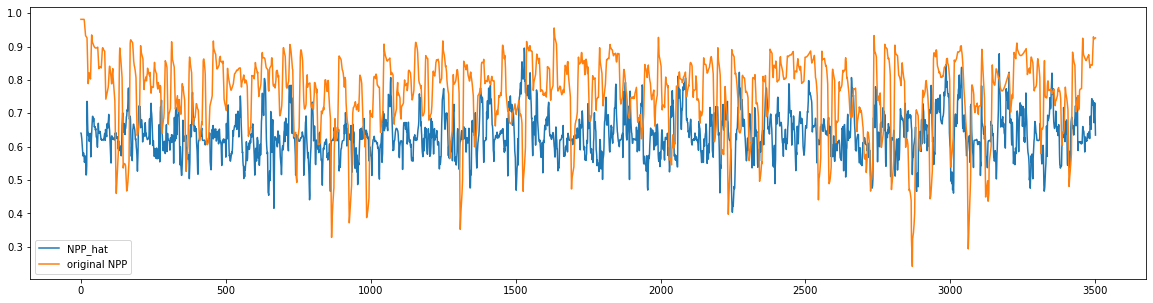

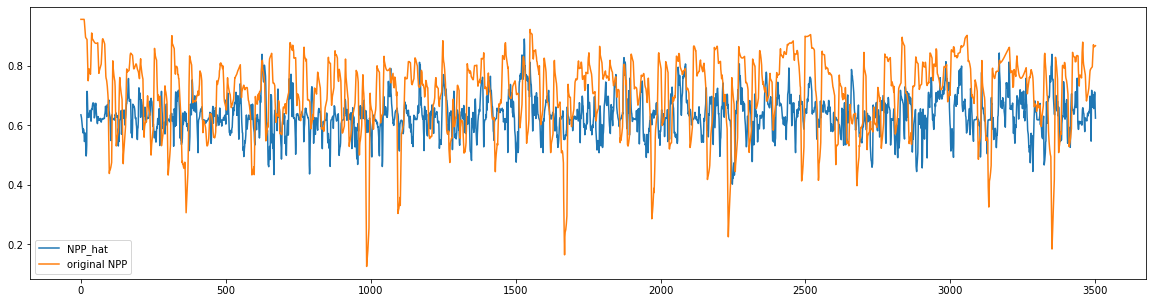

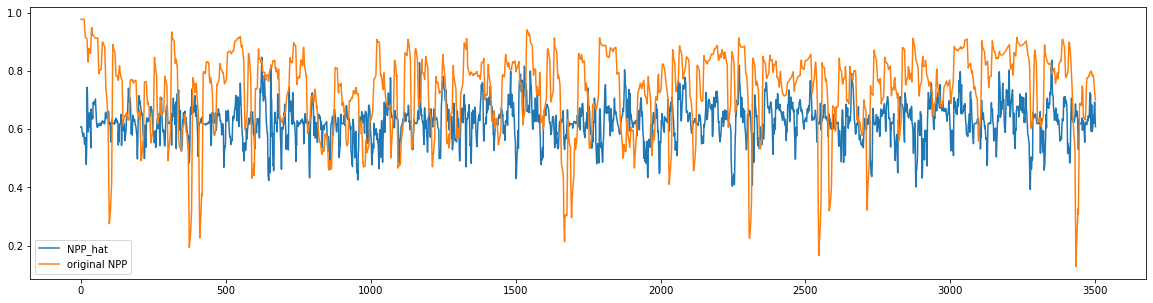

In [160]:
for i in range(20):
    test_dataset = hstack((normalize(moving_average(clear_precip[:,i],12)).reshape(-1,1),
                        normalize(moving_average(clear_airTemp[:,i],12)).reshape(-1,1),
                        normalize(moving_average(clear_rlns[:,i],12)).reshape(-1,1),
                        normalize(moving_average(clear_rsds[:,i],12)).reshape(-1,1),
                        normalize(moving_average(clear_npp[:,i],12)).reshape(-1,1)))
    n_step = 4
    train_x, train_y = split_sequences(train_dataset, n_step)
    test_x, test_y = split_sequences(test_dataset, n_step)                   
    y_hat_test = model.predict(test_x,verbose=0)
    plt.figure(figsize=(20,5))
    plt.plot(y_hat_test,label = "NPP_hat")
    plt.plot(test_y,label = "original NPP")
    plt.legend()
    plt.show